In [11]:
# 선형 대수와 관련된 함수를 쉽게 이용할 수 있는 모듈
import numpy as np
# 시각화 라이브러리
import matplotlib.pyplot as plt
# 파이토치의 기본 모듈
import torch
# 파이토치 모듈 중 인공 신경망 모델을 설계할 때 필요한 함수를 모아 놓은 모듈이다.
import torch.nn as nn
# torch.nn 모듈 중 자주 사용되는 함수를 'F' 로 지정
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(torch.__version__)
print(device)

1.7.1
cuda


In [9]:
# 파이썬 코드 내 하이퍼파라미터를 지정할 때 보통 영어 대문자로 표기
BATCH_SIZE = 32
EPOCHS = 10

In [14]:
# root는 데이터가 저장될 장소를 지정
# transform에서 transform.ToTensor는 해당 데이터를 tensor로 표현하며, 0~1사이의 정규화까지 진행시켜 준다.
train_dataset = datasets.MNIST(root = './data/', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data/',train = False, download=True, transform = transforms.ToTensor())

In [15]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [18]:
# 데이터 확인하기
for x,y in train_loader:
    print(type(x))
    print(type(y))
    print(x.size())
    print(y.size())
    break

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])


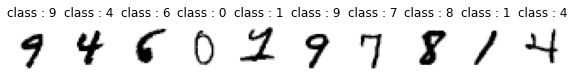

In [21]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(x[i].view(28,28).numpy(),cmap = 'gray_r')
    plt.title('class : ' + str(y[i].item()))

In [26]:
# Net 클래스를 정의하고, nn.Module 을 상속받는다.
class Net(nn.Module):
    # Net 클래스의 인스턴스를 생성했을 때, 지니게 되는 성질을 정의해주는 메서드
    def __init__(self):
        # nn.Module 내에 있는 메서드를 상속받아 이용한다.
        super().__init__() 
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    
    # Net 클래스를 이용해 설계한 MLP 모델의 Foward Propagation을 정의
    def forward(self,x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [67]:
# 정의한 모델을 MLP 모델을 'cuda'에 할당한다.
model = Net().to('cuda')

# 역전파 알고리즘을 이용해 파라미터를 업데이트할 때, 이용하는 Optimizer를 정의한다.
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum=0.5)

loss_func = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [68]:
def train(model, train_loader, optimizer, log_interval):
    # 모델을 훈련시키는 과정인지, 검증하는 과정인지 명시적으로 알려주는 코드
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to('cuda')
        label = label.to('cuda')
        optimizer.zero_grad()
        output = model(image)
        loss = loss_func(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("train epoch : {} [{} / {} ({:.0f} %] \tTrain Loss : {:.6f}".format(EPOCHS, batch_idx * len(image),len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

In [40]:
train(model, train_loader, optimizer, log_interval=200)

train epoch : 10 [0 / 60000 (0 %] 	Train Loss : 2.300956
train epoch : 10 [6400 / 60000 (11 %] 	Train Loss : 2.310178
train epoch : 10 [12800 / 60000 (21 %] 	Train Loss : 2.311797
train epoch : 10 [19200 / 60000 (32 %] 	Train Loss : 2.297429
train epoch : 10 [25600 / 60000 (43 %] 	Train Loss : 2.278566
train epoch : 10 [32000 / 60000 (53 %] 	Train Loss : 2.284381
train epoch : 10 [38400 / 60000 (64 %] 	Train Loss : 2.307610
train epoch : 10 [44800 / 60000 (75 %] 	Train Loss : 2.298872
train epoch : 10 [51200 / 60000 (85 %] 	Train Loss : 2.282972
train epoch : 10 [57600 / 60000 (96 %] 	Train Loss : 2.287829


In [69]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0
